In [1]:
import pandas as pd
from scipy.io import arff
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from scipy.stats import chisquare
from sklearn.feature_selection import chi2

import erlc as e
import dataPipeline as dp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataPipeline = dp.DataPipeline()

In [3]:
data = dataPipeline.loadData(num_sets = 15)
data.head()

Loading dataset #1
Loading dataset #2
Loading dataset #3
Loading dataset #4
Loading dataset #5
Loading dataset #6
Loading dataset #7
Loading dataset #8
Loading dataset #9
Loading dataset #10
Loading dataset #11
Loading dataset #12
Loading dataset #13
Loading dataset #14
Loading dataset #15
Finished Loading. Final Size = (78377, 129)


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'


In [4]:
X, y = dataPipeline.dataProc(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
erlc = e.ERLC(X_train = X_train, y_train = y_train)

In [5]:
final_chi = erlc.chi_test(X_test, y_test)

In [6]:
final_chi = np.nan_to_num(final_chi)

In [7]:
final_chi.shape

(37, 116)

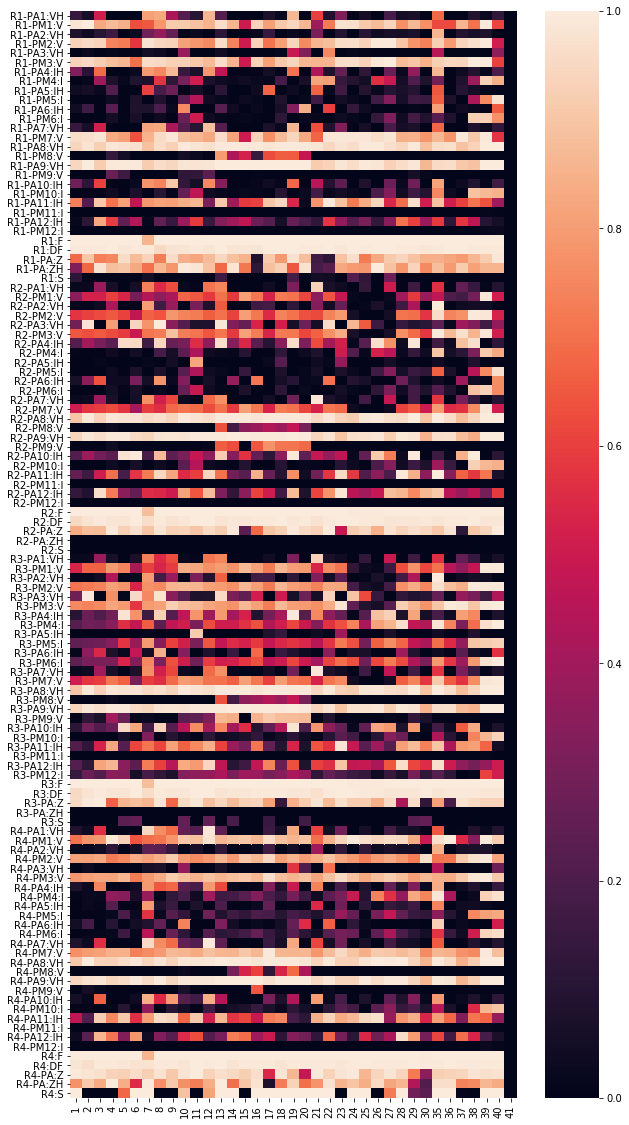

In [8]:
plt.figure(figsize=(10,20))
x_axis_labels = np.unique(y)
y_axis_labels = dataPipeline.getFeatureLabels(data)
sns.heatmap(np.transpose(final_chi), yticklabels = y_axis_labels, xticklabels = x_axis_labels)

In [14]:
score = erlc.localize(X_test[1], y_test[1])

In [15]:
score

array([[7.56021361e-02, 9.97264796e-01, 6.24032982e-02, ...,
        9.93797866e-01, 8.13624626e-01, 1.00000000e+00],
       [4.73304515e-02, 9.81721441e-01, 4.89905452e-02, ...,
        9.82082130e-01, 9.46981678e-01, 1.06853615e-11],
       [5.53913366e-01, 8.63711321e-01, 1.34994566e-01, ...,
        9.82656202e-01, 8.34002385e-01, 1.98068981e-04],
       ...,
       [3.92968782e-02, 9.97015066e-01, 1.80476171e-01, ...,
        9.77174296e-01, 8.86274842e-01, 1.00000000e+00],
       [2.01719683e-01, 6.27012168e-01, 6.27266009e-04, ...,
        9.81170701e-01, 8.52466797e-01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])